In [1]:
import csv
import pandas as pd
import numpy as np
from itertools import combinations
import random
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from Plackett_Luce import PL_fitting_list, PL_predict
import math


In [26]:
f = open('datasets/sushi3b.5000.10.order','r') 
unique_users=[]
n_items=100

u=0
dataset=[]
for line in f:
    u+=1 # user
    unique_users.append(u)
    l = map(int,line.split(' '))
    for (i,j) in combinations(l[:2],2):
        dataset.append((u,i+1,j+1))

In [27]:
len(dataset)
dataset[:10]
n_items=100



(2354, 1, 11)
(627, 1, 11)
(714, 1, 11)
(1155, 1, 11)
(4628, 1, 11)
(4591, 1, 11)
(2834, 1, 11)
(509, 1, 11)
(2515, 1, 11)
(4677, 1, 11)
(233, 1, 11)
(1388, 1, 11)
(2266, 1, 11)
(1811, 1, 11)
(4990, 1, 11)
(2028, 1, 11)
(796, 1, 11)
(4281, 1, 11)
(3398, 1, 11)
(389, 1, 11)
(1135, 1, 11)
(4530, 1, 11)
(449, 1, 11)
(4148, 1, 11)
(2140, 1, 11)
(3314, 1, 11)
(2687, 1, 11)
(2668, 1, 11)
(3683, 1, 11)
(4106, 1, 11)
(646, 1, 11)
(2986, 1, 11)
(3163, 1, 11)
(564, 1, 11)
(4061, 1, 11)
(2430, 1, 11)
(2394, 1, 11)
(2612, 1, 11)
(3049, 1, 11)
(1217, 1, 11)
(3931, 1, 11)
(2330, 1, 11)
(1645, 1, 11)
(4231, 1, 11)
(4209, 1, 11)
(2528, 1, 11)
(4411, 1, 11)
(4764, 1, 11)
(501, 1, 11)
(3861, 1, 11)
(4024, 1, 11)
(1886, 1, 11)
(243, 1, 11)
(4444, 1, 11)
(2870, 1, 11)
(2691, 1, 11)
(1220, 1, 11)
(1154, 1, 11)
(3040, 1, 11)
(1948, 1, 11)
(1348, 1, 11)
(2412, 1, 11)
(2385, 1, 11)
(2936, 1, 11)
(2784, 1, 11)
(3309, 1, 11)
(3463, 1, 11)
(3139, 1, 11)
(2440, 1, 11)
(4736, 1, 11)
(3816, 1, 11)
(3990, 1, 11)
(22

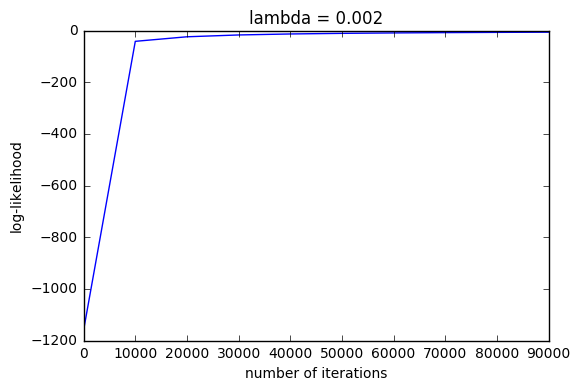

acp
eval
(2354, 1, 11)
(627, 1, 11)
(714, 1, 11)
(1155, 1, 11)
(4628, 1, 11)
(4591, 1, 11)
(2834, 1, 11)
(509, 1, 11)
(2515, 1, 11)
(4677, 1, 11)
(233, 1, 11)
(1388, 1, 11)
(2266, 1, 11)
(1811, 1, 11)
(4990, 1, 11)
(2028, 1, 11)
(796, 1, 11)
(4281, 1, 11)
(3398, 1, 11)
(389, 1, 11)
(1135, 1, 11)
(4530, 1, 11)
(449, 1, 11)
(4148, 1, 11)
(2140, 1, 11)
(3314, 1, 11)
(2687, 1, 11)
(2668, 1, 11)
(3683, 1, 11)
(4106, 1, 11)
(646, 1, 11)
(2986, 1, 11)
(3163, 1, 11)
(564, 1, 11)
(4061, 1, 11)
(2430, 1, 11)
(2394, 1, 11)
(2612, 1, 11)
(3049, 1, 11)
(1217, 1, 11)
(3931, 1, 11)
(2330, 1, 11)
(1645, 1, 11)
(4231, 1, 11)
(4209, 1, 11)
(2528, 1, 11)
(4411, 1, 11)
(4764, 1, 11)
(501, 1, 11)
(3861, 1, 11)
(4024, 1, 11)
(1886, 1, 11)
(243, 1, 11)
(4444, 1, 11)
(2870, 1, 11)
(2691, 1, 11)
(1220, 1, 11)
(1154, 1, 11)
(3040, 1, 11)
(1948, 1, 11)
(1348, 1, 11)
(2412, 1, 11)
(2385, 1, 11)
(2936, 1, 11)
(2784, 1, 11)
(3309, 1, 11)
(3463, 1, 11)
(3139, 1, 11)
(2440, 1, 11)
(4736, 1, 11)
(3816, 1, 11)
(3990, 1

In [28]:

###### COMMON FOR ALL DATASETS

random.shuffle(dataset)

split=int(0.8*len(dataset))
train_set=dataset[:split]
test_set=dataset[split:]


n_pairs= (n_items*(n_items-1)/2)
n_users=len(unique_users)
d=10


# dictionaries with indexes
dict_users={v:u for (u,v) in enumerate(unique_users)}
dict_pairs={v:u for (u,v) in enumerate(combinations(range(1,n_items+1),2))}
dict_pairs_={(j,i):u for ((i,j),u) in dict_pairs.items()}

##############################
#                            #
#       Functions            #
#                            #
##############################

# compute proba that user i prefers item i over item j
def compute_proba(W_users, W_pairs, W_pairs_,data):
    (u,i,j)=data
    idx_user=dict_users[u]
    w_u=W_users[:, idx_user]
    
    pair=(i,j)
     
    if i<j:
        idx_pair=dict_pairs[pair]
        w_pair=W_pairs[:, idx_pair]
        w_pair_=W_pairs_[:, idx_pair]
        #w_pair_=-w_pair
    if i>j:
        idx_pair=dict_pairs_[pair]
        w_pair=W_pairs_[:, idx_pair]
        w_pair_=W_pairs[:, idx_pair]
        #w_pair_=-w_pair
        
    sc=np.dot(w_pair, w_u)
    sc_=np.dot(w_pair_, w_u)
    p=(np.exp(sc))/((np.exp(sc)+np.exp(sc_))*1.0)
    return p

    
def compute_lnlikelihood(W_users, W_pairs, W_pairs_,dataset):
    L=0
    for data in dataset:
        p=compute_proba(W_users, W_pairs, W_pairs_,data)
        L+=np.log(p)
    return L

def compute_derivative_coeff(w_u, w_pair, w_pair_):
    x_uij=np.dot(w_pair-w_pair_,w_u)
    coeff=(-np.exp(-x_uij))/((1+np.exp(-x_uij))*1.0)
    return coeff

    
    
##############################
#                            #
#         Experiment         #
#                            #
##############################

if __name__ == '__main__':
    
    # INIT

    V_users=np.random.random((d, n_users))
    V_pairs=np.random.random((d, n_pairs))
    V_pairs_=np.random.random((d, n_pairs))
    
    N=0
    good=0
    
    for data in test_set:
        (u,i,j)=data
        preference=(i,j)
        print data
        p_ij=compute_proba(V_users, V_pairs, V_pairs_,(u,i,j))
        p_ji=compute_proba(V_users, V_pairs, V_pairs_,(u,j,i))
        
        if p_ij>p_ji:
            prediction=(i,j)
        else:
            prediction=(j,i)
    
        if prediction==preference:
            good+=1
    
        N+=1
        
    tx_init=good/(N*1.0)
    print 'success rate of our model before training '+str(tx_init)
    
    
    # TRAIN
    
    n_iter=100000
    lambd= 0.05
    listI=[]
    listL=[]
    
    for k in range(n_iter):
         if k<500:
             lambd=1/((k+1)*1.0)
         #if k> 10000:
         #    lambd=0.05
         data=random.choice(train_set)
         (u,i,j)=data
         
         idx_user=dict_users[u]
         w_u=V_users[:, idx_user]
         
         pair=(i,j)
         
         if i<j:
             idx_pair=dict_pairs[pair]
             w_pair=V_pairs[:, idx_pair]
             w_pair_=V_pairs_[:, idx_pair]
         if i>j:
             idx_pair=dict_pairs_[pair]
             w_pair=V_pairs_[:, idx_pair]
             w_pair_=V_pairs[:, idx_pair]
              
         coeff= compute_derivative_coeff(w_u, w_pair, w_pair_)
         
         if math.isnan(coeff):
             print data
             raise Exception('coeff is nan')
             
         # gradient descent
         w_u=w_u-lambd*coeff*(w_pair-w_pair_)
         w_pair=w_pair-lambd*coeff*w_u
         w_pair_=w_pair_-lambd*coeff*(-w_u)    
         
         #print 'norm w_u '+str(np.linalg.norm(w_u))
         #print 'norm w_pair '+str(np.linalg.norm(w_pair))
         #print 'norm w_pair_ '+str(np.linalg.norm(w_pair_))
         # replace
         V_users[:, idx_user]=w_u
         
         if i<j:
             V_pairs[:, idx_pair]=w_pair
             V_pairs_[:, idx_pair]=w_pair_
         if i>j:
             V_pairs_[:, idx_pair]=w_pair
             V_pairs[:, idx_pair]=w_pair_
             
         if np.mod(k, 10000)==0:
             print k
             L=compute_lnlikelihood(V_users, V_pairs, V_pairs_,train_set)
             print L
             listL.append(L)
             listI.append(k)
    
    
    # to plot likelihood
    plt.figure() 
    plt.plot(listI,listL)
    plt.xlabel('number of iterations')
    plt.ylabel('log-likelihood')
    plt.title('lambda = '+str(lambd))
    plt.savefig('figures/likelihood_training_sushi_d10')
    plt.show()
    plt.close()
    
    print 'acp'
    """
    vocab_users=[str(k) for k in dict_users.keys()]
    vocab_pairs=[str(k) for k in dict_pairs.keys()]+[str(k) for k in dict_pairs_.keys()]
    vocab=vocab_users+vocab_pairs
    vectors_users = [V_users[:,i] for i in range(V_users.shape[1])]
    vectors_pairs=[V_pairs[:,i] for i in range(V_pairs.shape[1])]
    vectors_pairs_=[V_pairs_[:,i] for i in range(V_pairs.shape[1])]
    vectors=vectors_users+vectors_pairs+vectors_pairs_
    """
    
    # PCA
    """
    def acp_info(data):
        pca = PCA(n_components=2)
        pca.fit(data)    
        matrix_reduced = pca.transform(data)
        return matrix_reduced
    
    
    matrix_reduced=acp_info(vectors)
    X=[matrix_reduced[i][0] for i in range(len(vectors))]
    Y=[matrix_reduced[i][1] for i in range(len(vectors))]
    
    plt.figure()
    for word, x, y in zip(vocab, X, Y): 
        text=plt.annotate(word, (x, y), size=12)
        text.set_fontsize(8)
        if word in vocab_users:
            plt.plot(x, y, 'o', markersize=4, color='blue')  
        if word in vocab_pairs:
            plt.plot(x, y, 'o', markersize=4, color='red')  
    plt.savefig('figures/results_acp_sushi')
    plt.show()
    plt.close()
    """
        
    # EVAL
    print 'eval'
    N=0
    good=0
    
    for data in test_set:
        (u,i,j)=data
        preference=(i,j) # the true one
        print data
        p_ij=compute_proba(V_users, V_pairs, V_pairs_,(u,i,j))
        p_ji=compute_proba(V_users, V_pairs, V_pairs_,(u,j,i))
        
        if p_ij>p_ji:
            prediction=(i,j)
        else:
            prediction=(j,i)
            
        if prediction==preference:
            good+=1
        N+=1
    tx_final=good/(N*1.0)
    print 'success rate of our model before training '+str(tx_init)
    print 'success rate of our model after training '+str(tx_final)
    
    # comparison to Plackett Luce?
    
    train_plackett=[(i,j) for (u,i,j) in train_set]
    Gamma = PL_fitting_list(train_plackett,n_items,50)
    
    N=0
    good=0
    
    for data in test_set:
        (u,i,j)=data
        preference=(i,j)
        
        p_ij=PL_predict(Gamma,(i,j))
        p_ji=PL_predict(Gamma,(j,i))
        
        if p_ij>p_ji:
            prediction=(i,j)
        else:
            prediction=(j,i)
        if prediction==preference:
            good+=1
        N+=1
    tx_pl=good/(N*1.0)
    print 'success rate of PlackettLuce '+str(tx_pl)


In [13]:
dict_pairs

{(32, 54): 2625,
 (14, 74): 1268,
 (52, 70): 3791,
 (50, 96): 3720,
 (21, 28): 1796,
 (4, 36): 325,
 (8, 63): 726,
 (7, 25): 596,
 (63, 76): 4259,
 (40, 49): 3128,
 (11, 90): 1023,
 (33, 41): 2679,
 (16, 47): 1410,
 (72, 92): 4563,
 (73, 82): 4580,
 (54, 92): 3906,
 (1, 64): 62,
 (2, 78): 174,
 (41, 57): 3195,
 (78, 86): 4704,
 (27, 46): 2267,
 (12, 59): 1080,
 (52, 98): 3819,
 (15, 30): 1309,
 (19, 91): 1700,
 (20, 75): 1764,
 (76, 88): 4661,
 (41, 74): 3212,
 (42, 88): 3284,
 (5, 84): 468,
 (6, 98): 576,
 (45, 61): 3425,
 (10, 97): 941,
 (49, 58): 3632,
 (30, 100): 2534,
 (13, 20): 1128,
 (39, 70): 3089,
 (90, 100): 4904,
 (55, 100): 3959,
 (20, 58): 1747,
 (59, 97): 4126,
 (38, 62): 3020,
 (23, 95): 2018,
 (8, 87): 750,
 (45, 78): 3442,
 (84, 95): 4824,
 (85, 87): 4831,
 (32, 77): 2648,
 (14, 77): 1271,
 (52, 94): 3815,
 (53, 62): 3830,
 (1, 40): 38,
 (57, 59): 4005,
 (17, 20): 1466,
 (4, 35): 324,
 (8, 38): 701,
 (7, 22): 593,
 (48, 77): 3600,
 (11, 83): 1016,
 (33, 34): 2672,
 (16